In [2]:
from tqdm import tqdm

In [3]:
# %load C://D_Backup/Neural_network_code/image_classification-master/problem_unittests.py
import os
import numpy as np
import tensorflow as tf
from unittest.mock import MagicMock


def test_folder_path_100(cifar10_dataset_folder_path):
    assert cifar10_dataset_folder_path is not None,\
        'Cifar-10 data folder not set.'
    assert cifar10_dataset_folder_path[-1] != '/',\
        'The "/" shouldn\'t be added to the end of the path.'
    assert os.path.exists(cifar10_dataset_folder_path),\
        'Path not found.'
    assert os.path.isdir(cifar10_dataset_folder_path),\
        '{} is not a folder.'.format(os.path.basename(cifar10_dataset_folder_path))

    train_files = [cifar10_dataset_folder_path + '/train']
    other_files = [cifar10_dataset_folder_path + '/meta', cifar10_dataset_folder_path + '/test']
    missing_files = [path for path in train_files + other_files if not os.path.exists(path)]

    assert not missing_files,\
        'Missing files in directory: {}'.format(missing_files)

    print('All files found!')


def test_normalize(normalize):
    test_shape = (np.random.choice(range(1000)), 32, 32, 3)
    test_numbers = np.random.choice(range(256), test_shape)
    normalize_out = normalize(test_numbers)

    assert type(normalize_out).__module__ == np.__name__,\
        'Not Numpy Object'

    assert normalize_out.shape == test_shape,\
        'Incorrect Shape. {} shape found'.format(normalize_out.shape)

    assert normalize_out.max() <= 1 and normalize_out.min() >= 0,\
        'Incorect Range. {} to {} found'.format(normalize_out.min(), normalize_out.max())

    print('Normalization Tests Passed.')


def test_one_hot_encode(one_hot_encode):
    test_shape = np.random.choice(range(1000))
    test_numbers = np.random.choice(range(10), test_shape)
    one_hot_out = one_hot_encode(test_numbers)

    assert type(one_hot_out).__module__ == np.__name__,\
        'Not Numpy Object'

    assert one_hot_out.shape == (test_shape, 10),\
        'Incorrect Shape. {} shape found'.format(one_hot_out.shape)

    n_encode_tests = 5
    test_pairs = list(zip(test_numbers, one_hot_out))
    test_indices = np.random.choice(len(test_numbers), n_encode_tests)
    labels = [test_pairs[test_i][0] for test_i in test_indices]
    enc_labels = np.array([test_pairs[test_i][1] for test_i in test_indices])
    new_enc_labels = one_hot_encode(labels)

    assert np.array_equal(enc_labels, new_enc_labels),\
        'Encodings returned different results for the same numbers.\n' \
        'For the first call it returned:\n' \
        '{}\n' \
        'For the second call it returned\n' \
        '{}\n' \
        'Make sure you save the map of labels to encodings outside of the function.'.format(enc_labels, new_enc_labels)

    print('One-Hot-Encode Tests Passed.')


def test_nn_image_inputs(neural_net_image_input):
    image_shape = (32, 32, 3)
    nn_inputs_out_x = neural_net_image_input(image_shape)

    assert nn_inputs_out_x.get_shape().as_list() == [None, image_shape[0], image_shape[1], image_shape[2]],\
        'Incorrect Image Shape.  Found {} shape'.format(nn_inputs_out_x.get_shape().as_list())

    assert nn_inputs_out_x.op.type == 'Placeholder',\
        'Incorrect Image Type.  Found {} type'.format(nn_inputs_out_x.op.type)

    assert nn_inputs_out_x.name == 'x:0', \
        'Incorrect Name.  Found {}'.format(nn_inputs_out_x.name)

    print('Image Input Tests Passed.')


def test_nn_label_inputs(neural_net_label_input):
    n_classes = 10
    nn_inputs_out_y = neural_net_label_input(n_classes)

    assert nn_inputs_out_y.get_shape().as_list() == [None, n_classes],\
        'Incorrect Label Shape.  Found {} shape'.format(nn_inputs_out_y.get_shape().as_list())

    assert nn_inputs_out_y.op.type == 'Placeholder',\
        'Incorrect Label Type.  Found {} type'.format(nn_inputs_out_y.op.type)

    assert nn_inputs_out_y.name == 'y:0', \
        'Incorrect Name.  Found {}'.format(nn_inputs_out_y.name)

    print('Label Input Tests Passed.')


def test_nn_keep_prob_inputs(neural_net_keep_prob_input):
    nn_inputs_out_k = neural_net_keep_prob_input()

    assert nn_inputs_out_k.get_shape().ndims is None,\
        'Too many dimensions found for keep prob.  Found {} dimensions.  It should be a scalar (0-Dimension Tensor).'.format(nn_inputs_out_k.get_shape().ndims)

    assert nn_inputs_out_k.op.type == 'Placeholder',\
        'Incorrect keep prob Type.  Found {} type'.format(nn_inputs_out_k.op.type)

    assert nn_inputs_out_k.name == 'keep_prob:0', \
        'Incorrect Name.  Found {}'.format(nn_inputs_out_k.name)

    print('Keep Prob Tests Passed.')


def test_con_pool(conv2d_maxpool):
    test_x = tf.placeholder(tf.float32, [None, 32, 32, 5])
    test_num_outputs = 10
    test_con_k = (2, 2)
    test_con_s = (4, 4)
    test_pool_k = (2, 2)
    test_pool_s = (2, 2)

    conv2d_maxpool_out = conv2d_maxpool(test_x, test_num_outputs, test_con_k, test_con_s, test_pool_k, test_pool_s)

    assert conv2d_maxpool_out.get_shape().as_list() == [None, 4, 4, 10],\
        'Incorrect Shape.  Found {} shape'.format(conv2d_maxpool_out.get_shape().as_list())

    print('Convolution Layer Test Passed.')


def test_flatten(flatten):
    test_x = tf.placeholder(tf.float32, [None, 10, 30, 6])
    flat_out = flatten(test_x)

    assert flat_out.get_shape().as_list() == [None, 10*30*6],\
        'Incorrect Shape.  Found {} shape'.format(flat_out.get_shape().as_list())

    print('Flatten Layer Test Passed.')


def test_fully_conn(fully_conn):
    test_x = tf.placeholder(tf.float32, [None, 128])
    test_num_outputs = 40

    fc_out = fully_conn(test_x, test_num_outputs)

    assert fc_out.get_shape().as_list() == [None, 40],\
        'Incorrect Shape.  Found {} shape'.format(fc_out.get_shape().as_list())

    print('Flatten Layer Test Passed.')


def test_output(output):
    test_x = tf.placeholder(tf.float32, [None, 128])
    test_num_outputs = 40

    output_out = output(test_x, test_num_outputs)

    assert output_out.get_shape().as_list() == [None, 40],\
        'Incorrect Shape.  Found {} shape'.format(output_out.get_shape().as_list())

    print('Output Layer Test Passed.')


def test_conv_net(conv_net):
    test_x = tf.placeholder(tf.float32, [None, 32, 32, 3])
    test_k = tf.placeholder(tf.float32)

    logits_out = conv_net(test_x, test_k)

    assert logits_out.get_shape().as_list() == [None, 10],\
        'Incorrect Model Output.  Found {}'.format(logits_out.get_shape().as_list())

    print('Neural Network Built!')


def test_train_nn(train_neural_network):
    mock_session = tf.Session()
    test_x = np.random.rand(128, 32, 32, 3)
    test_y = np.random.rand(128, 10)
    test_k = np.random.rand(1)
    test_optimizer = tf.train.AdamOptimizer()

    mock_session.run = MagicMock()
    train_neural_network(mock_session, test_optimizer, test_k, test_x, test_y)

    assert mock_session.run.called, 'Session not used'

    print('Neural Network Test Passed.')


In [58]:
# %load C://D_Backup/Neural_network_code/image_classification-master/helper.py
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer


def _load_label_names():
    """
    Load the label names from file
    """
    
   # 'aquatic mammals',  'fish',  'flowers',  'food containers',  'fruit and vegetables',  
#'household electrical devices',  
    #'household furniture',  'insects',  'large carnivores',  'large man-made outdoor things',  
    #'large natural outdoor scenes',  
    #'large omnivores and herbivores',  'medium-sized mammals',  'non-insect invertebrates', 
    #'people',  'reptiles',  'small mammals',  'trees',  'vehicles 1',  'vehicles 2'
    
    
    return ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']


def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    """
    Load a batch of the dataset
    """
    with open(cifar10_dataset_folder_path + '/train', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
    #print('batch file: ')
    #print(batch)
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['fine_labels']

    #print('labels list for 100 classes: 'labels[20])
    
    return features, labels


def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    """
    Display Stats of the the dataset
    """
    batch_ids = list(range(1, 1))

    #print(batch_ids)
    #if batch_id not in batch_ids:
     #   print('Batch Id out of Range. Possible Batch Ids: {}'.format(batch_ids))
      #  return None

    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)

    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    #print('\nStats of batch {}:'.format(batch_id))
    #print('Samples: {}'.format(len(features)))
    #print('Label Counts: {}'.format(dict(zip(*np.unique(labels, return_counts=True)))))
    #print('All Labels: {}'.format(labels[:]))

    sample_image = features[sample_id]
    sample_label = labels[sample_id]
    label_names = _load_label_names()

    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    plt.axis('off')
    plt.imshow(sample_image)
    plt.ion()
    plt.show()
    plt.pause(0.001)
    input("Press [enter] to continue.")

def _preprocess_and_save(normalize, one_hot_encode, features, labels, filename):
    """
    Preprocess data and save it to file
    """
    features = normalize(features)
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))


def preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode):
    """
    Preprocess Training and Validation Data
    """
    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        validation_count = int(len(features) * 0.1)

        # Prprocess and save a batch of training data
        _preprocess_and_save(
            normalize,
            one_hot_encode,
            features[:-validation_count],
            labels[:-validation_count],
            'preprocess_batch_100' + '.p')

        # Use a portion of training batch for validation
        valid_features.extend(features[-validation_count:])
        valid_labels.extend(labels[-validation_count:])

    # Preprocess and Save all validation data
    _preprocess_and_save(
        normalize,
        one_hot_encode,
        np.array(valid_features),
        np.array(valid_labels),
        'preprocess_validation_100.p')

    with open(cifar10_dataset_folder_path + '/test', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # load the training data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['fine_labels']

    #print('test labels printed from helper.py:::::', test_labels)
    # Preprocess and Save all training data
    _preprocess_and_save(
        normalize,
        one_hot_encode,
        np.array(test_features),
        np.array(test_labels),
        'preprocess_training_100.p')


def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]


def load_preprocess_training_batch(batch_id, batch_size):
    """
    Load the Preprocessed Training data and return them in batches of <batch_size> or less
    """
    filename = 'preprocess_batch_100' + '.p'
    features, labels = pickle.load(open(filename, mode='rb'))

    # Return the training data in batches of size <batch_size> or less
    return batch_features_labels(features, labels, batch_size)


def display_image_predictions(features, labels, predictions):
    n_classes = 10
    label_names = _load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=4, ncols=2)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 3
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]

        axies[image_i][0].imshow(feature)
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])


In [28]:
from urllib.request import urlretrieve
from os.path import isfile, isdir

#import problem_unittests as tests
import tarfile
#import helper
import numpy as np
from sklearn import preprocessing

cifar10_dataset_folder_path = 'C://D_Backup/Neural_network_code/image_classification-master/cifar-100-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

test_folder_path_100(cifar10_dataset_folder_path)

All files found!



Example of Image 45700:
Image - Min Value: 1 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 95 Name: whale


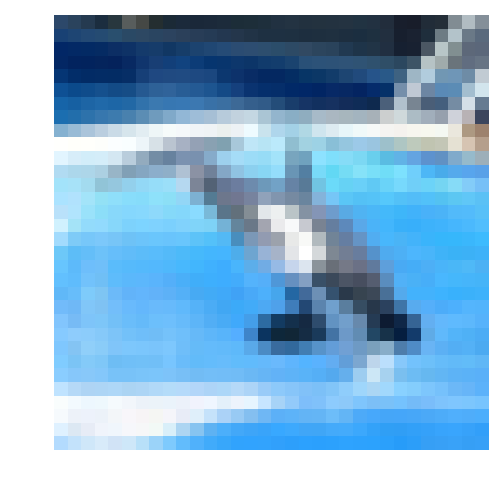

Press [enter] to continue.


In [29]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 45700
display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

In [30]:
def normalize(x):
    w = 0
    pixels = np.ndarray((len(x), 32, 32, 3))
    for p in x:
        p = p.flatten()
        p = abs((p - 128.) / 128.)
        p = p.reshape(1, 32, 32, 3)
        pixels[w, :, :, :] = p
        w += 1
    return pixels


test_normalize(normalize)

Normalization Tests Passed.


In [31]:
def one_hot_encode(x):
    classes = list(range(100))
    lb = preprocessing.LabelBinarizer()
    lb.fit(classes)
    return lb.transform(x)
   
    
test_one_hot_encode(one_hot_encode)

One-Hot-Encode Tests Passed.


In [32]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

In [33]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
#import problem_unittests as tests
#import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation_100.p', mode='rb'))

In [34]:
import tensorflow as tf

# Build each neural network layer into a function.
# INPUT LAYER:

def neural_net_image_input(image_shape):
    return tf.placeholder(tf.float32, shape=(None, image_shape[0], image_shape[1], image_shape[2]), name='x')


def neural_net_label_input(n_classes):
    return tf.placeholder(tf.float32, shape=(None, n_classes), name='y')


def neural_net_keep_prob_input():
    return tf.placeholder(tf.float32, name='keep_prob') 


tf.reset_default_graph()
test_nn_image_inputs(neural_net_image_input)
test_nn_label_inputs(neural_net_label_input)
test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


In [35]:
# CONVOLUTION & MAX POOLING LAYER:
    
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    weight = tf.Variable(
                 tf.truncated_normal(
                     shape=[conv_ksize[0], conv_ksize[1], x_tensor.get_shape().as_list()[3], conv_num_outputs],
                     mean=0.0,
                     stddev=0.1))
    bias = tf.Variable(tf.zeros(shape=conv_num_outputs))
    
    conv = tf.nn.conv2d(x_tensor, weight, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    hidden = tf.nn.relu(conv + bias)
    pool = tf.nn.max_pool(hidden,
                         ksize=[1, pool_ksize[0], pool_ksize[1], 1],
                         strides=[1, pool_strides[0], pool_strides[1], 1],
                         padding='SAME')
    return pool


test_con_pool(conv2d_maxpool)

Convolution Layer Test Passed.


In [36]:
# FLATTEN LAYER:

def flatten(x_tensor):
    shaped = x_tensor.get_shape().as_list()
    reshaped = tf.reshape(x_tensor, [-1, shaped[1] * shaped[2] * shaped[3]])
    return reshaped


test_flatten(flatten)

Flatten Layer Test Passed.


In [37]:
# FULLY CONNECTED LAYER:

def fully_conn(x_tensor, num_outputs):
    weight = tf.Variable(tf.truncated_normal(shape=[x_tensor.get_shape().as_list()[1], num_outputs], mean=0.0, stddev=0.1)) 
    bias = tf.Variable(tf.zeros(shape=num_outputs))
    return tf.nn.relu(tf.matmul(x_tensor, weight) + bias)

test_fully_conn(fully_conn)

Flatten Layer Test Passed.


In [38]:
# OUTPUT LAYER:
    
def output(x_tensor, num_outputs):
    weight = tf.Variable(tf.truncated_normal(shape=[x_tensor.get_shape().as_list()[1], num_outputs], mean=0.0, stddev=0.1)) 
    bias = tf.Variable(tf.zeros(shape=num_outputs))
    return tf.matmul(x_tensor, weight) + bias


test_output(output)

Output Layer Test Passed.


In [39]:
# Create a convolutional model function

depth1 = 64
depth2 = 128
depth3 = 256
depth_full1 = 512
depth_full2 = 128
classes = 10 


def conv_net(x, keep_prob):
    model = conv2d_maxpool(x, depth1, (3,3), (1,1), (2,2), (2,2))
    model = conv2d_maxpool(model, depth2, (3,3), (1,1), (2,2), (2,2))
    model = conv2d_maxpool(model, depth3, (3,3), (1,1), (2,2), (2,2))
    model = flatten(model)
    model = fully_conn(model, depth_full1)
    model = tf.nn.dropout(model, keep_prob)
    model = fully_conn(model, depth_full2)
    return output(model, classes)


##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')


test_conv_net(conv_net)
# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

test_conv_net(conv_net)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Neural Network Built!
Neural Network Built!


In [40]:
# Train the neural network

def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    feed_dict = {
            x: feature_batch, 
            y: label_batch, 
            keep_prob: keep_probability}
    session.run(optimizer, feed_dict=feed_dict)

# Took off this test bc it wouldn't load the magicmock feature from unittest
# I can add picture of it working on my spyder IDE if needed

In [41]:
# Show stats

def print_stats(session, feature_batch, label_batch, cost, accuracy):
    current_cost = session.run(
        cost,
        feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.})
    valid_accuracy = session.run(
        accuracy,
        feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.})
    print('Loss: {:<8.3} Valid Accuracy: {:<5.3}'.format(
        current_cost,
        valid_accuracy))

In [42]:
epochs = 2
batch_size = 64
keep_probability = 0.7

In [43]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i))
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  
Loss: 5.84e+11 Valid Accuracy: 0.0106
Epoch  2, CIFAR-10 Batch 1:  
Loss: 7.43e+13 Valid Accuracy: 0.0106


In [44]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification_100'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 2
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i),)
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  
Loss: 9.23e+10 Valid Accuracy: 0.007
Epoch  1, CIFAR-10 Batch 2:  
Loss: 2.63e+13 Valid Accuracy: 0.913
Epoch  2, CIFAR-10 Batch 1:  
Loss: 1.98e+14 Valid Accuracy: 0.913
Epoch  2, CIFAR-10 Batch 2:  
Loss: 0.0      Valid Accuracy: 0.0088


In [50]:
#### pre-process image and predict
import PIL
from PIL import Image

dim = 32
newImage = Image.open('C://Users/583175/Pictures/orange.jpg')
newImage = newImage.resize((dim, dim), PIL.Image.ANTIALIAS)
newImageArr = np.array(newImage)
newImageArr.shape
newImageArr = newImageArr.reshape(1, 32, 32, 3)
newImageArr.shape

(1, 32, 32, 3)

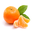

In [51]:
newImage

In [78]:
with open(cifar10_dataset_folder_path + '/test', mode='rb') as file:
        batchTest = pickle.load(file, encoding='latin1')

# load the training data
test_featuresTest = batchTest['data'].reshape((len(batchTest['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
test_labelsTest = batchTest['fine_labels']
print(test_featuresTest[0].shape)
print(test_labelsTest[9])

(32, 32, 3)
0


In [79]:
test_features, test_labels = pickle.load(open('preprocess_training_100.p', mode='rb'))
#print(test_labels[0])
newdata=test_features[0]
newlabel=test_labels[9]
print(newdata.shape)
print(newlabel)

print('reshaped data')
newdata = newdata.reshape(1, 32, 32, 3)
newlabel = newlabel.reshape(1, 100)
#print(newdata.shape)
#print(newlabel.shape)
#print(newlabel)

newdata = newImageArr
top_n_predictions = 100
loaded_graph = tf.Graph()

with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        
        #print(sess.run(loaded_acc, feed_dict={loaded_x: newdata, loaded_y: newlabel, loaded_keep_prob: 1.0}))
    
        predictions = sess.run(tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: newdata, loaded_y: newlabel, loaded_keep_prob: 1.0})
        
        print(predictions.indices, predictions.values)
        label_id=predictions.indices[0][0]
        #print('label ID: ',label_id)
        label_names = _load_label_names()  
        correct_name = label_names[label_id]
        print('predicted image is: ', correct_name)
        #print(sess.run(loaded_y, feed_dict={loaded_x:newdata}))

(32, 32, 3)
[1 0 0 0 0 0 0 0 0 0]
reshaped data


ValueError: cannot reshape array of size 10 into shape (1,100)

[[[0.296875  0.03125   0.1640625]
  [0.296875  0.03125   0.1640625]
  [0.2890625 0.0234375 0.171875 ]
  ...
  [0.1953125 0.0234375 0.15625  ]
  [0.21875   0.        0.140625 ]
  [0.21875   0.0078125 0.140625 ]]

 [[0.28125   0.0078125 0.1953125]
  [0.2734375 0.0078125 0.1875   ]
  [0.265625  0.        0.1953125]
  ...
  [0.109375  0.0703125 0.1796875]
  [0.1953125 0.015625  0.15625  ]
  [0.203125  0.03125   0.1875   ]]

 [[0.2734375 0.        0.1953125]
  [0.2734375 0.0078125 0.1875   ]
  [0.265625  0.        0.1875   ]
  ...
  [0.109375  0.0390625 0.1328125]
  [0.1953125 0.0078125 0.1484375]
  [0.2109375 0.03125   0.1875   ]]

 ...

 [[0.2109375 0.0390625 0.203125 ]
  [0.2109375 0.03125   0.1953125]
  [0.203125  0.0390625 0.203125 ]
  ...
  [0.265625  0.03125   0.171875 ]
  [0.28125   0.046875  0.15625  ]
  [0.2890625 0.046875  0.15625  ]]

 [[0.21875   0.0234375 0.1953125]
  [0.2109375 0.03125   0.1953125]
  [0.203125  0.0390625 0.203125 ]
  ...
  [0.2734375 0.0390625 0.1640625]
  [0

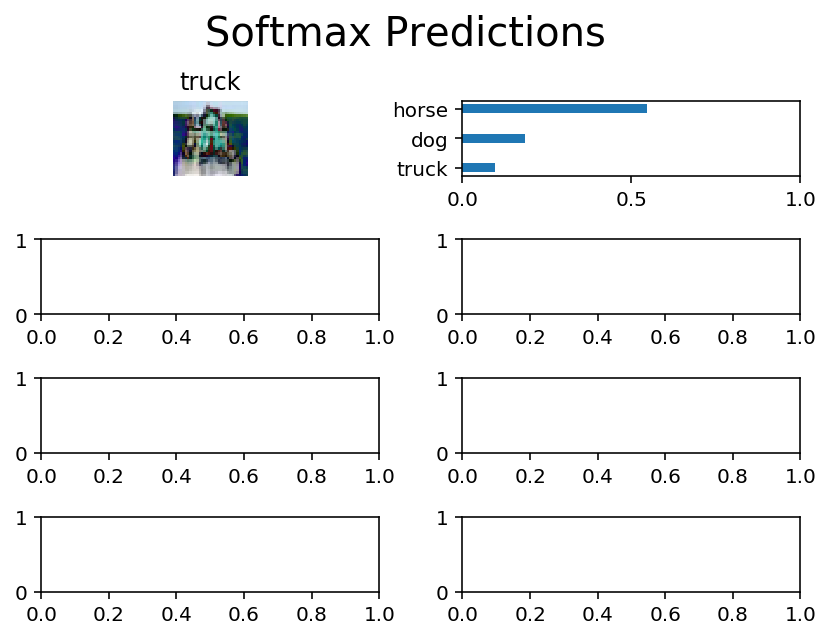

In [69]:

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
#import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification_100'
n_samples = 1
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training_100.p', mode='rb'))
    loaded_graph = tf.Graph()

    #print(test_features[10])
    #print(test_labels[10])
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions)
        #print(random_test_features.shape)
        #print(len(random_test_labels))
        #print(len(random_test_predictions))


test_model()